Found 17572 files belonging to 38 classes.


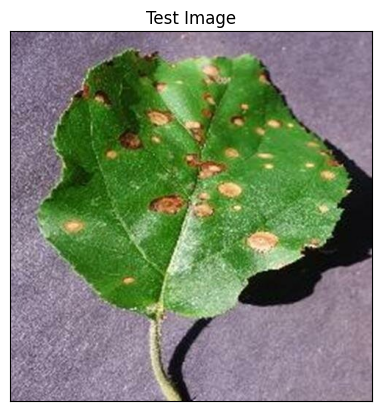

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


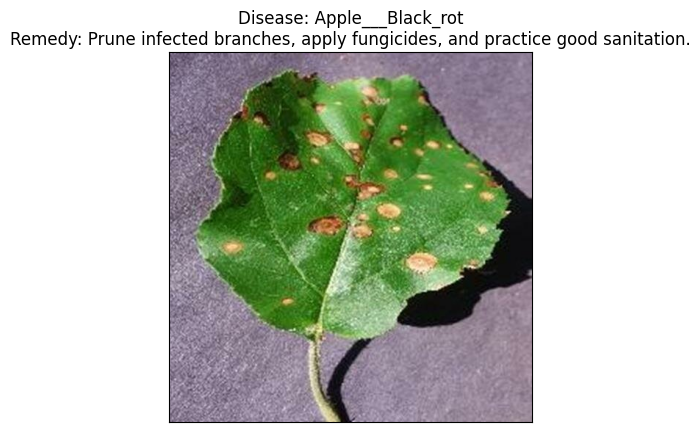

Disease: Apple___Black_rot
Remedy: Prune infected branches, apply fungicides, and practice good sanitation.
More Info: https://extension.umn.edu/plant-diseases/black-rot-apple
Buy Products: https://www.amazon.com/s?k=black+rot+fungicide


In [25]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Dictionary mapping disease names to their remedies
remedies = {
    'Apple___Apple_scab': 'Apply appropriate fungicides like captan or mancozeb. Remove infected leaves and avoid overhead watering.',
    'Apple___Black_rot': 'Prune infected branches, apply fungicides, and practice good sanitation.',
    'Apple___Cedar_apple_rust': 'Remove nearby juniper hosts, apply fungicides in early spring.',
    'Apple___healthy': 'No action needed, the plant is healthy.',
    'Blueberry___healthy': 'No action needed, the plant is healthy.',
    'Cherry_(including_sour)___Powdery_mildew': 'Apply sulfur-based fungicides and ensure good air circulation.',
    'Cherry_(including_sour)___healthy': 'No action needed, the plant is healthy.',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 'Use resistant varieties, rotate crops, and apply fungicides.',
    'Corn_(maize)___Common_rust_': 'Apply fungicides if necessary, plant resistant varieties.',
    'Corn_(maize)___Northern_Leaf_Blight': 'Use resistant hybrids, rotate crops, apply fungicides if needed.',
    'Corn_(maize)___healthy': 'No action needed, the plant is healthy.',
    'Grape___Black_rot': 'Apply fungicides and practice good pruning and sanitation.',
    'Grape___Esca_(Black_Measles)': 'Prune out infected wood, apply fungicides.',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 'Apply fungicides and ensure good vineyard sanitation.',
    'Grape___healthy': 'No action needed, the plant is healthy.',
    'Orange___Haunglongbing_(Citrus_greening)': 'No known cure, but control of Asian citrus psyllid can help. Remove and destroy infected trees.',
    'Peach___Bacterial_spot': 'Use copper-based bactericides and resistant varieties.',
    'Peach___healthy': 'No action needed, the plant is healthy.',
    'Pepper,_bell___Bacterial_spot': 'Use copper-based bactericides, avoid overhead watering, and remove infected plants.',
    'Pepper,_bell___healthy': 'No action needed, the plant is healthy.',
    'Potato___Early_blight': 'Apply fungicides like chlorothalonil, practice crop rotation.',
    'Potato___Late_blight': 'Use resistant varieties, apply fungicides like mancozeb or chlorothalonil, and ensure good air circulation.',
    'Potato___healthy': 'No action needed, the plant is healthy.'
}

# Dictionary mapping disease names to their remedy URLs
remedies_url = {
    'Apple___Apple_scab': {
        'info_url': 'https://extension.umn.edu/plant-diseases/apple-scab',
        'product_url': 'https://www.amazon.com/s?k=apple+scab+fungicide'
    },
    'Apple___Black_rot': {
        'info_url': 'https://extension.umn.edu/plant-diseases/black-rot-apple',
        'product_url': 'https://www.amazon.com/s?k=black+rot+fungicide'
    },
    'Apple___Cedar_apple_rust': {
        'info_url': 'https://www.canr.msu.edu/news/cedar_apple_rust',
        'product_url': 'https://www.amazon.com/s?k=cedar+apple+rust+fungicide'
    },
    'Apple___healthy': {
        'info_url': 'https://www.gardeningknowhow.com/edible/fruits/apple/healthy-apple-tree-guide.htm',
        'product_url': 'https://www.amazon.com/s?k=apple+tree+care'
    },
    'Blueberry___healthy': {
        'info_url': 'https://www.gardeningknowhow.com/edible/fruits/blueberry/healthy-blueberry-plant-guide.htm',
        'product_url': 'https://www.amazon.com/s?k=blueberry+plant+care'
    },
    'Cherry_(including_sour)__Powdery_mildew': {
        'info_url': 'https://extension.psu.edu/cherry-disease-powdery-mildew',
        'product_url': 'https://www.amazon.com/s?k=powdery+mildew+fungicide'
    },
    'Cherry_(including_sour)__healthy': {
        'info_url': 'https://www.gardeningknowhow.com/edible/fruits/cherry/healthy-cherry-tree-guide.htm',
        'product_url': 'https://www.amazon.com/s?k=cherry+tree+care'
    },
    'Corn(maize)__Cercospora_leaf_spot Gray_leaf_spot': {
        'info_url': 'https://cropwatch.unl.edu/plantdisease/corn/gray-leaf-spot',
        'product_url': 'https://www.amazon.com/s?k=corn+fungicide'
    },
    'Corn(maize)__Common_rust': {
        'info_url': 'https://www.extension.iastate.edu/news/common-rust-corn-can-be-managed',
        'product_url': 'https://www.amazon.com/s?k=common+rust+fungicide'
    },
    'Corn(maize)__Northern_Leaf_Blight': {
        'info_url': 'https://cropwatch.unl.edu/plantdisease/corn/northern-corn-leaf-blight',
        'product_url': 'https://www.amazon.com/s?k=northern+leaf+blight+fungicide'
    },
    'Corn(maize)healthy': {
        'info_url': 'https://www.gardeningknowhow.com/edible/vegetables/corn/healthy-corn-plant-guide.htm',
        'product_url': 'https://www.amazon.com/s?k=corn+plant+care'
    },
    'Grape___Black_rot': {
        'info_url': 'https://extension.psu.edu/grape-disease-black-rot',
        'product_url': 'https://www.amazon.com/s?k=grape+black+rot+fungicide'
    },
    'Grape___Esca(Black_Measles)': {
        'info_url': 'https://www.winemag.com/2021/02/09/esca-black-measles-wine/',
        'product_url': 'https://www.amazon.com/s?k=esca+fungicide'
    },
    'Grape___Leaf_blight(Isariopsis_Leaf_Spot)': {
        'info_url': 'https://www.planetnatural.com/pest-problem-solver/plant-disease/leaf-blight/',
        'product_url': 'https://www.amazon.com/s?k=leaf+blight+fungicide'
    },
    'Grape___healthy': {
        'info_url': 'https://www.gardeningknowhow.com/edible/fruits/grape/healthy-grapevine-guide.htm',
        'product_url': 'https://www.amazon.com/s?k=grapevine+care'
    },
    'Orange___Haunglongbing(Citrus_greening)': {
        'info_url': 'https://www.aphis.usda.gov/aphis/resources/pests-diseases/save-our-citrus/citrus-greening',
        'product_url': 'https://www.amazon.com/s?k=citrus+greening+treatment'
    },
    'Peach___Bacterial_spot': {
        'info_url': 'https://hgic.clemson.edu/factsheet/peach-disease-bacterial-spot/',
        'product_url': 'https://www.amazon.com/s?k=bacterial+spot+fungicide'
    },
    'Peach___healthy': {
        'info_url': 'https://www.gardeningknowhow.com/edible/fruits/peach/healthy-peach-tree-guide.htm',
        'product_url': 'https://www.amazon.com/s?k=peach+tree+care'
    },
    'Pepper,_bell___Bacterial_spot': {
        'info_url': 'https://extension.umn.edu/disease-management/bacterial-spot-pepper-and-tomato',
        'product_url': 'https://www.amazon.com/s?k=bacterial+spot+fungicide'
    },
    'Pepper,_bell___healthy': {
        'info_url': 'https://www.gardeningknowhow.com/edible/vegetables/pepper/healthy-pepper-plant-guide.htm',
        'product_url': 'https://www.amazon.com/s?k=pepper+plant+care'
    },
    'Potato___Early_blight': {
        'info_url': 'https://www.apsnet.org/edcenter/disandpath/fungalasco/pdlessons/Pages/EarlyBlight.aspx',
        'product_url': 'https://www.amazon.com/s?k=early+blight+fungicide'
    },
    'Potato___Late_blight': {
        'info_url': 'https://www.apsnet.org/edcenter/disandpath/fungalasco/pdlessons/Pages/LateBlight.aspx',
        'product_url': 'https://www.amazon.com/s?k=late+blight+fungicide'
    },
    'Potato___healthy': {
        'info_url': 'https://www.gardeningknowhow.com/edible/vegetables/potato/healthy-potato-plant-guide.htm',
        'product_url': 'https://www.amazon.com/s?k=potato+plant+care'
    }
}

# Load the trained model
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

# Load class names from the validation set
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_names = validation_set.class_names

# Test Image Visualization
image_path = r'test\test\AppleBlack.png'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Preprocess the image for prediction
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.

# Predict the disease
predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions)
model_prediction = class_names[result_index]

# Display the prediction, remedy, and URL
remedy = remedies.get(model_prediction, "Remedy not found for this disease.")
remedy_url = remedies_url.get(model_prediction, {'info_url': 'URL not found', 'product_url': 'URL not found'})

plt.imshow(img)
plt.title(f"Disease: {model_prediction}\nRemedy: {remedy}")
plt.xticks([])
plt.yticks([])
plt.show()

print(f"Disease: {model_prediction}")
print(f"Remedy: {remedy}")
print(f"More Info: {remedy_url['info_url']}")
print(f"Buy Products: {remedy_url['product_url']}")
